# Distributions Revisited

In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

## Sampling and the Central Limit Theorem

Recall the difference between sample and population. Statisticians (and data scientists!) are often in the position of making predictions about some population based on a sample drawn from that population:

- I interview 100 Washingtonians and take their responses to be representative of state opinions generally.

- I measure the lengths of 200 fish in Puget Sound and speculate about the lengths of _all_ the fish in the Sound.

Question: Are the _statistics_ I calculate on my sample representative of the statistics of the population?

Note: The difference between a sample statistic and the population statistic is called the **sampling error**.

Reflection: What factors might be responsible for a large (or small) sampling error?

Suppose I take many samples and calculate statistics on each. Would _those_ illuminate the population statistics?

The Central Limit Theorem (CLT) says that, under suitable conditions, the sum of independent random variables will converge to a normal distribution in the limit as the number of variables increases infinitely. The CLT will often hold _even when_ the underlying random variables are _not_ themselves normally distributed!

Let's look at some examples:

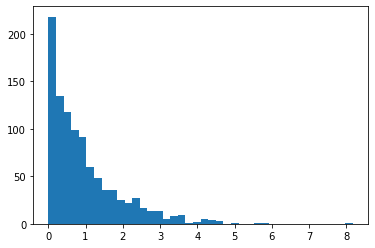

In [3]:
# Let's start with 1000 draws from an exponential distribution.

test = stats.expon.rvs(size=1000, random_state=42)

plt.hist(test, bins=40);

In [7]:
# Let's look at the means of samples from this exponential distribution
# I won't bother specifying a random state this time.
# Let's also experiment with the number of samples we draw.

means = []

for _ in range(100):
    means.append(np.mean(stats.expon.rvs(size=100)))
    
means

[0.9240068229581426,
 0.931500637340517,
 1.2271070990327344,
 0.8275568558764839,
 0.8538748848613917,
 1.0378021981263232,
 0.9300747181102282,
 1.0295810641702998,
 0.9808259436139589,
 0.9435938007464538,
 0.8248698480512613,
 0.9362524177598921,
 1.2255270662266782,
 1.0341881322672934,
 0.8523853867624619,
 1.0996859304585656,
 1.0177212786898289,
 0.8586633565801621,
 0.9767960441946408,
 1.0393237182312642,
 0.946620010442807,
 1.0060454917688366,
 0.9511509115928699,
 1.1791989703209114,
 0.9792282722919109,
 0.949340679448876,
 1.0331157888606182,
 1.1421578923307851,
 0.9594771169855478,
 0.9441496415661179,
 0.9539603931727934,
 0.9949899981419201,
 1.0331350647345356,
 0.9852973540034985,
 0.9537344421374603,
 1.0779437474255102,
 0.9105567563262276,
 0.9378147972335102,
 1.053528127695228,
 1.0029726583339917,
 1.0629571074481434,
 1.0530687360255029,
 1.1550968094167857,
 0.9787985875634382,
 0.7935303744312869,
 1.166970029951722,
 1.050305131234486,
 0.7904059599482735

(array([ 3.,  4.,  8., 20., 22., 24.,  6.,  7.,  5.,  1.]),
 array([0.73924226, 0.79520347, 0.85116468, 0.90712589, 0.9630871 ,
        1.0190483 , 1.07500951, 1.13097072, 1.18693193, 1.24289314,
        1.29885435]),
 <a list of 10 Patch objects>)

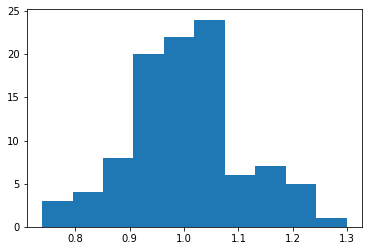

In [8]:
# Let's make a histogram. Suppose we choose about 50 bins.

plt.hist(means)

In [12]:
# Now let's try the same thing for binomial random variates.
# We'll use 100 single trials. We can tinker with p.

means = []

for _ in range(100000):
    means.append(np.mean(stats.binom.rvs(n=1, p=0.5, size=100)))

(array([4.000e+00, 0.000e+00, 7.000e+00, 0.000e+00, 1.100e+01, 0.000e+00,
        0.000e+00, 1.600e+01, 0.000e+00, 3.300e+01, 0.000e+00, 0.000e+00,
        9.700e+01, 0.000e+00, 1.590e+02, 0.000e+00, 0.000e+00, 2.450e+02,
        0.000e+00, 4.380e+02, 0.000e+00, 7.100e+02, 0.000e+00, 0.000e+00,
        1.139e+03, 0.000e+00, 1.633e+03, 0.000e+00, 0.000e+00, 2.224e+03,
        0.000e+00, 3.124e+03, 0.000e+00, 0.000e+00, 3.910e+03, 0.000e+00,
        4.785e+03, 0.000e+00, 0.000e+00, 5.787e+03, 0.000e+00, 6.671e+03,
        0.000e+00, 7.260e+03, 0.000e+00, 0.000e+00, 7.608e+03, 0.000e+00,
        7.869e+03, 0.000e+00, 0.000e+00, 7.724e+03, 0.000e+00, 7.449e+03,
        0.000e+00, 0.000e+00, 6.709e+03, 0.000e+00, 5.671e+03, 0.000e+00,
        4.939e+03, 0.000e+00, 0.000e+00, 3.974e+03, 0.000e+00, 2.969e+03,
        0.000e+00, 0.000e+00, 2.319e+03, 0.000e+00, 1.628e+03, 0.000e+00,
        0.000e+00, 1.107e+03, 0.000e+00, 7.540e+02, 0.000e+00, 0.000e+00,
        4.410e+02, 0.000e+00, 2.560e+0

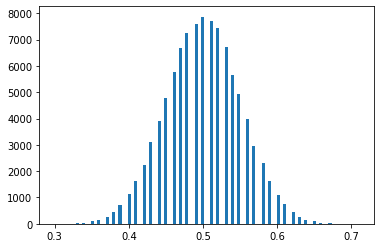

In [13]:
# Plotting here
plt.hist(means, bins=100)


In [20]:
# Let's try it for standard deviations of a geometric distribution.

stds = []

for _ in range(1000):
    stds.append(np.std(stats.geom.rvs(size=1000, p=0.5)))

(array([  5.,  43.,  84., 218., 257., 221., 117.,  37.,  15.,   3.]),
 array([1.21724238, 1.25963489, 1.30202741, 1.34441993, 1.38681245,
        1.42920497, 1.47159749, 1.51399001, 1.55638253, 1.59877505,
        1.64116757]),
 <a list of 10 Patch objects>)

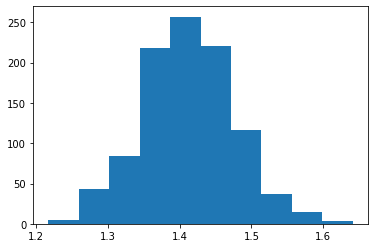

In [21]:
# Plot
plt.hist(stds)


In [23]:
# Try it with minimum values of a normal distribution.
mins = []

for _ in range(1000):
    mins.append(np.min(stats.norm.rvs(size=100)))
mins

[-2.2993112333286847,
 -2.7863383026854214,
 -2.6241565862164937,
 -2.6749872706359965,
 -2.9738992000715183,
 -2.6100429769630926,
 -2.3890194231205353,
 -2.770351370095749,
 -3.1281086002233853,
 -1.9202248303421228,
 -2.212044774519887,
 -2.4748661096530378,
 -1.9754145656864368,
 -2.482928803016037,
 -2.606874637414354,
 -2.546134831519603,
 -2.126847773420308,
 -2.4484362768356545,
 -2.350833578751996,
 -2.4822291056187917,
 -2.30158518078206,
 -3.1562408095651575,
 -2.353579304619709,
 -2.8854043397896865,
 -1.5576140587311966,
 -3.149169963021765,
 -2.356756915586477,
 -3.256714063070162,
 -2.488038442804367,
 -2.481103825549354,
 -1.908694718177403,
 -2.4027270891866945,
 -2.6378573159705017,
 -3.1986623033838506,
 -2.2783635004365888,
 -2.464044041920161,
 -2.1299806706130826,
 -2.9680871216168607,
 -2.1682488314621513,
 -2.300033886254661,
 -2.160719468289015,
 -2.627032588418521,
 -2.2957371350941096,
 -1.8946887887852497,
 -2.6524566380878514,
 -2.6816718094206897,
 -2.7177

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  2.,
         2.,  1.,  1.,  0.,  3.,  2.,  4.,  0.,  4.,  5.,  3.,  1.,  6.,
         7.,  9., 14., 16.,  9., 11., 20., 17., 19., 15., 15., 26., 20.,
        24., 26., 23., 25., 33., 37., 34., 32., 44., 32., 40., 36., 30.,
        43., 32., 37., 32., 26., 29., 27., 19., 20., 18., 13., 13., 13.,
         6.,  3.,  6.,  4.,  2.,  1.,  2.,  0.,  1.]),
 array([-5.21991906, -5.18245605, -5.14499303, -5.10753002, -5.070067  ,
        -5.03260399, -4.99514097, -4.95767796, -4.92021495, -4.88275193,
        -4.84528892, -4.8078259 , -4.77036289, -4.73289987, -4.69543686,
        -4.65797384, -4.62051083, -4.58304782, -4.5455848 , -4.50812179,
        -4.47065877, -4.43319576, -4.39573274, -4.35826973, -4.32080671,
        -4.2833437 , -4.24588069, -4.20841767, -4.17095466, -4.133491

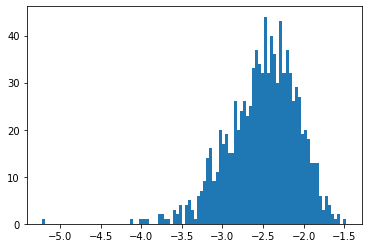

In [24]:
# Plot

plt.hist(mins, bins=100)

### So why do we, as data scientists, care about the Central Limit Theorem?

- Lots of tools assume variables have normal distributions
- Check subsets of data